In [ ]:
%load_ext lab_black

import numpy as np
from math import sqrt
import pandas as pd
import datetime
import operator
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objects as go
import plotly.express as px
from matplotlib import colors as mcolors
from sklearn.linear_model import LinearRegression, BayesianRidge, Lasso
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import csv
from datetime import timedelta
import requests
import folium
from plotly.subplots import make_subplots

In [2]:
map_access_token = "pk.eyJ1IjoiZGFuYWFiaGk3MTE5IiwiYSI6ImNrOGw5cjA1YzAwaG8zbm44d2dqMmF2cHkifQ.OttP_QaQp-BDSzQY5qBf1w"
px.set_mapbox_access_token(
    "pk.eyJ1IjoiZGFuYWFiaGk3MTE5IiwiYSI6ImNrOGw5cjA1YzAwaG8zbm44d2dqMmF2cHkifQ.OttP_QaQp-BDSzQY5qBf1w"
)
pyo.init_notebook_mode()

In [3]:
%matplotlib inline


class style:
    BOLD = "\033[1m"
    END = "\033[0m"

In [4]:
confirmUrl = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"
deathUrl = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv"
recoverUrl = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv"


# get latest data

ccs = requests.get(confirmUrl, allow_redirects=True)
open("time_series_covid_19_confirmed.csv", "wb").write(ccs.content)

dcs = requests.get(deathUrl, allow_redirects=True)
open("time_series_covid_19_deaths.csv", "wb").write(dcs.content)

rcs = requests.get(recoverUrl, allow_redirects=True)
open("time_series_covid_19_recovered.csv", "wb").write(rcs.content)

# save to CSV

57006

In [49]:
confirmedcountry = pd.read_csv("./time_series_covid_19_confirmed.csv")
deathscountry = pd.read_csv("./time_series_covid_19_deaths.csv")
recoveredcountry = pd.read_csv("./time_series_covid_19_recovered.csv")
indiadata = pd.read_csv(
    "./covid_19_india.csv",
    header=0,
    names=[
        "SN",
        "States",
        "Active",
        "Confirmed",
        "Deaths",
        "Recovered",
        "Date",
        "Lat",
        "Lon",
    ],
)

In [50]:
# funcation to get all conuntry data


def getAllCountryConfirmedData():
    return confirmedcountry


def getAllCountryDeathsData():
    return deathscountry


def getAllCountryRecoveredData():
    return recoveredcountry


def getIndiaData():
    return indiadata

In [51]:
# funcation to get last data of each table
def getLastDateOfConfirmed():
    cols = confirmedcountry.keys()
    return cols[cols.size - 1]


def getLastDateOfDeaths():
    cols = deathscountry.keys()
    return cols[cols.size - 1]


def getLastDateOfRecoverd():
    cols = recoveredcountry.keys()
    return cols[cols.size - 1]


# funcatoin To get date range of table
def getDateRange(data):
    datescols = data.columns
    return data.loc[:, datescols[4] : datescols[-1]]

In [52]:
# get sort data by Country/Region


def sortdatabyCountryRegion(data):
    return data.groupby("Country/Region").sum().sort_values(by="Country/Region")

In [53]:
# get top 10 most cases country


def getTopConfirmedCaseCountry():
    return confirmedcountry.sort_values(
        by=getLastDateOfConfirmed(), ascending=False
    ).head(10)


def getTopDeathCaseCountry():
    return deathscountry.sort_values(by=getLastDateOfDeaths(), ascending=False).head(10)


def getTopRecoverCaseCountry():
    return recoveredcountry.sort_values(
        by=getLastDateOfRecoverd(), ascending=False
    ).head(10)

In [54]:
def getCountryName(data):
    return data.groupby("Country/Region").sum()

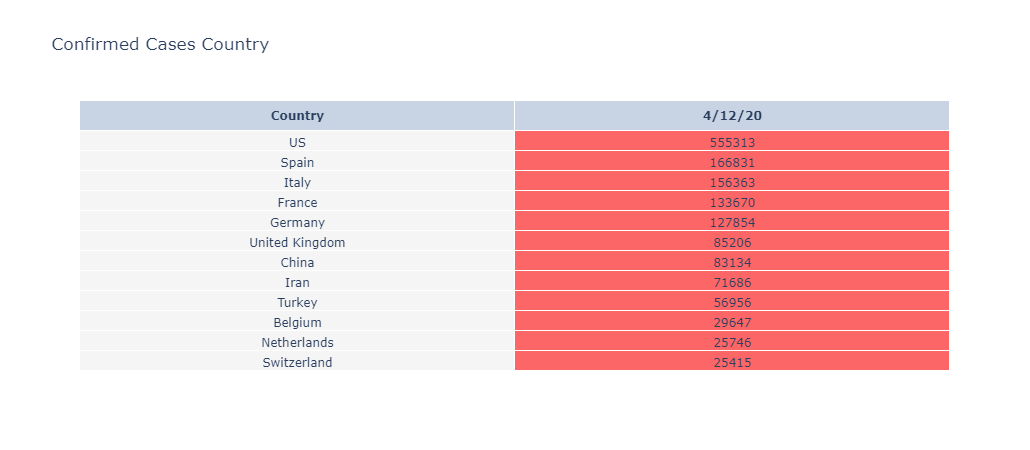

In [55]:
# Showing the table of Confirmed Table

data = (
    getAllCountryConfirmedData()
    .groupby("Country/Region")[getLastDateOfConfirmed()]
    .sum()
    .sort_values(ascending=False)
)

fig = go.Figure(
    data=[
        go.Table(
            header=dict(
                values=["<b>Country</b>", "<b>" + getLastDateOfConfirmed() + "</b>"]
            ),
            cells=dict(
                values=[data.index, data.values],
                fill=dict(
                    color=[
                        "rgb(245, 245, 245)",  # unique color for the first column
                        [
                            "rgba(0, 250, 0, 0.6)"
                            if val <= 1000
                            else "rgba(250, 0, 0, 0.6)"
                            for val in data.values
                        ],
                    ]
                ),
            ),
        )
    ]
)
fig.update_layout(title="Confirmed Cases Country")
fig.show()

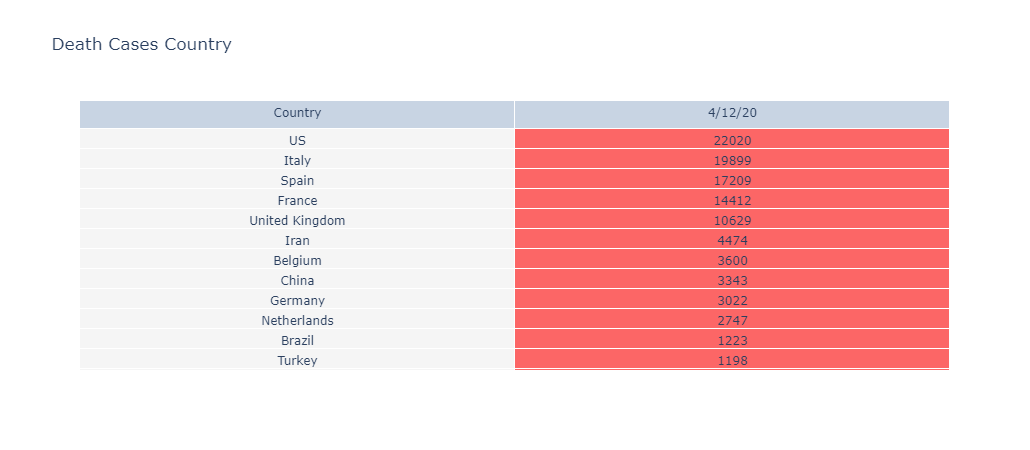

In [56]:
# Showing the table of Death Table

data = (
    getAllCountryDeathsData()
    .groupby("Country/Region")[getLastDateOfConfirmed()]
    .sum()
    .sort_values(ascending=False)
)

fig = go.Figure(
    data=[
        go.Table(
            header=dict(values=["Country", getLastDateOfDeaths()]),
            cells=dict(
                values=[data.index, data.values],
                fill=dict(
                    color=[
                        "rgb(245, 245, 245)",  # unique color for the first column
                        [
                            "rgba(0, 250, 0, 0.6)"
                            if val <= 1000
                            else "rgba(250, 0, 0, 0.6)"
                            for val in data.values
                        ],
                    ]
                ),
            ),
        )
    ]
)
fig.update_layout(title="Death Cases Country")
fig.show()

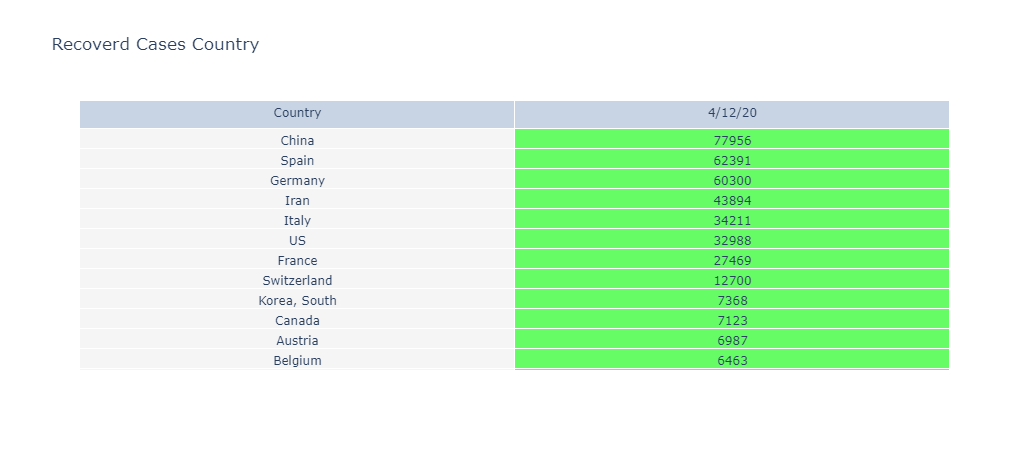

In [57]:
# Showing the table of Recovered Table

data = (
    getAllCountryRecoveredData()
    .groupby("Country/Region")[getLastDateOfRecoverd()]
    .sum()
    .sort_values(ascending=False)
)

fig = go.Figure(
    data=[
        go.Table(
            header=dict(values=["Country", getLastDateOfRecoverd()]),
            cells=dict(
                values=[data.index, data.values],
                fill=dict(
                    color=[
                        "rgb(245, 245, 245)",  # unique color for the first column
                        [
                            "rgba(0, 250, 0, 0.6)"
                            if val >= 1000
                            else "rgba(250, 0, 0, 0.6)"
                            for val in data.values
                        ],
                    ]
                ),
            ),
        )
    ]
)
fig.update_layout(title="Recoverd Cases Country")
fig.show()

In [58]:
topConfirmedCasesCountry = getTopConfirmedCaseCountry()
topDeathCasesCountry = getTopDeathCaseCountry()
topRecoverCasesCountry = getTopRecoverCaseCountry()

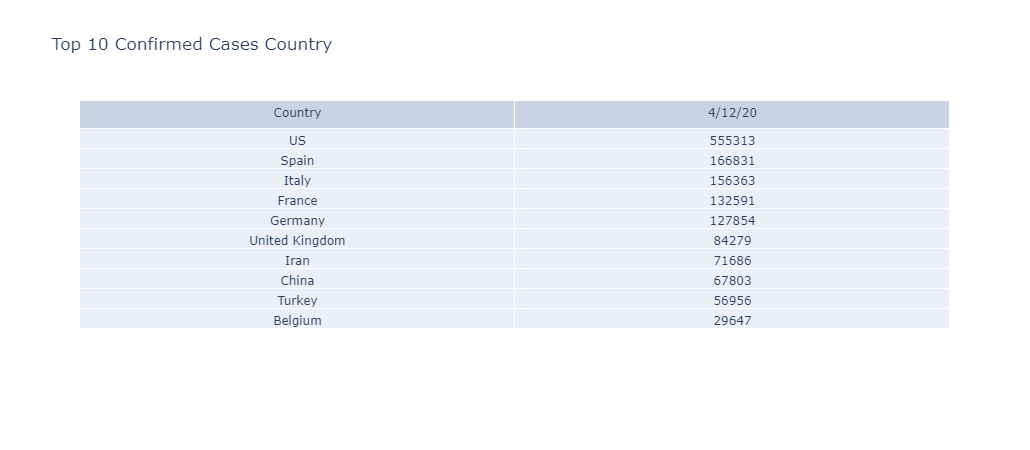

In [59]:
# Showing top 10 Confirmed Cases Country In Tabular Format


fig = go.Figure(
    data=[
        go.Table(
            header=dict(values=["Country", getLastDateOfConfirmed()]),
            cells=dict(
                values=[
                    topConfirmedCasesCountry["Country/Region"],
                    topConfirmedCasesCountry[getLastDateOfConfirmed()],
                ]
            ),
        )
    ]
)
fig.update_layout(title="Top 10 Confirmed Cases Country")
fig.show()

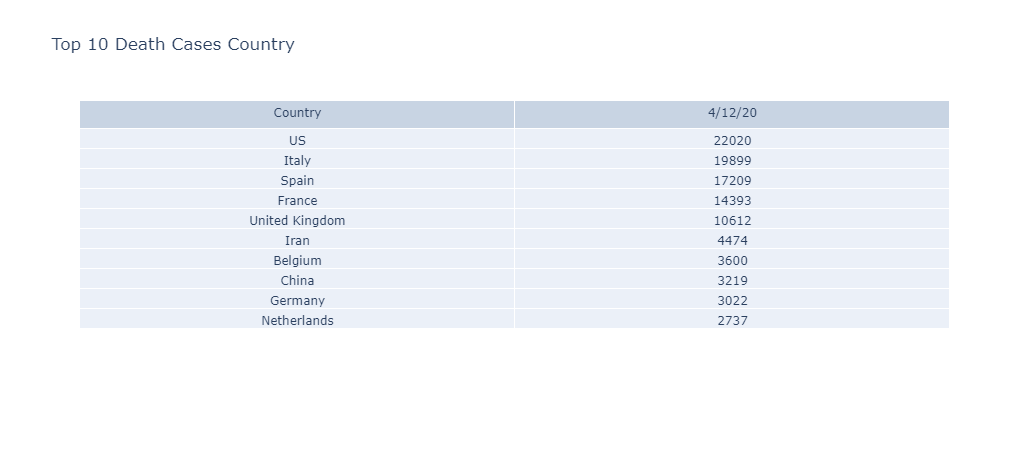

In [60]:
# Showing top 10 Death Cases Country In Tabular Format


fig = go.Figure(
    data=[
        go.Table(
            header=dict(values=["Country", getLastDateOfDeaths()]),
            cells=dict(
                values=[
                    topDeathCasesCountry["Country/Region"],
                    topDeathCasesCountry[getLastDateOfDeaths()],
                ]
            ),
        )
    ]
)
fig.update_layout(title="Top 10 Death Cases Country")
fig.show()

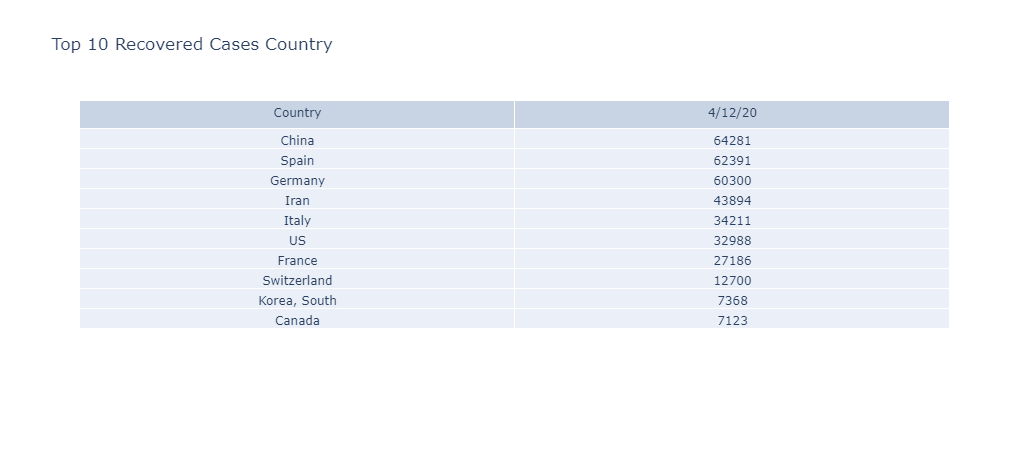

In [61]:
# Showing top 10 Recover Cases Country In Tabular Format
# print(style.BOLD + "\nTop 10 Recover Cases Country\n" + style.END)
# print(topRecoverCasesCountry[['Country/Region',getLastDateOfRecoverd()]].to_string(index=False))


fig = go.Figure(
    data=[
        go.Table(
            header=dict(values=["Country", getLastDateOfRecoverd()]),
            cells=dict(
                values=[
                    topRecoverCasesCountry["Country/Region"],
                    topRecoverCasesCountry[getLastDateOfRecoverd()],
                ],
            ),
        )
    ]
)
fig.update_layout(title="Top 10 Recovered Cases Country")
fig.show()

In [62]:
# get date range of each table

confirmdateRange = getDateRange(confirmedcountry)
recoverdateRange = getDateRange(recoveredcountry)
deathdateRange = getDateRange(deathscountry)

# get data of each from funcation

confirmedCountryData = getAllCountryConfirmedData()
deathsCountryData = getAllCountryDeathsData()
recoveredCountryData = getAllCountryRecoveredData()

In [63]:
# For Visualization We Need Latest Data

latest_confirmed = confirmedCountryData[getLastDateOfConfirmed()]
latest_deaths = deathscountry[getLastDateOfDeaths()]
latest_recoveries = recoveredcountry[getLastDateOfRecoverd()]

In [64]:
unique_confirmed_countries = list(confirmedCountryData["Country/Region"].unique())
unique_deaths_countries = list(deathsCountryData["Country/Region"].unique())
unique_recoveries_countries = list(recoveredCountryData["Country/Region"].unique())

In [65]:
# getting the uniques confirmed cases

confirmed_country_cases = []
no_cases = []

for i in unique_confirmed_countries:
    cases = latest_confirmed[confirmedCountryData["Country/Region"] == i].sum()

    if cases > 0:
        confirmed_country_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_confirmed_countries.remove(i)

unique_confirmed_countries = [
    k
    for k, v in sorted(
        zip(unique_confirmed_countries, confirmed_country_cases),
        key=operator.itemgetter(1),
        reverse=False,
    )
]
for i in range(len(unique_confirmed_countries)):
    confirmed_country_cases[i] = latest_confirmed[
        confirmedCountryData["Country/Region"] == unique_confirmed_countries[i]
    ].sum()

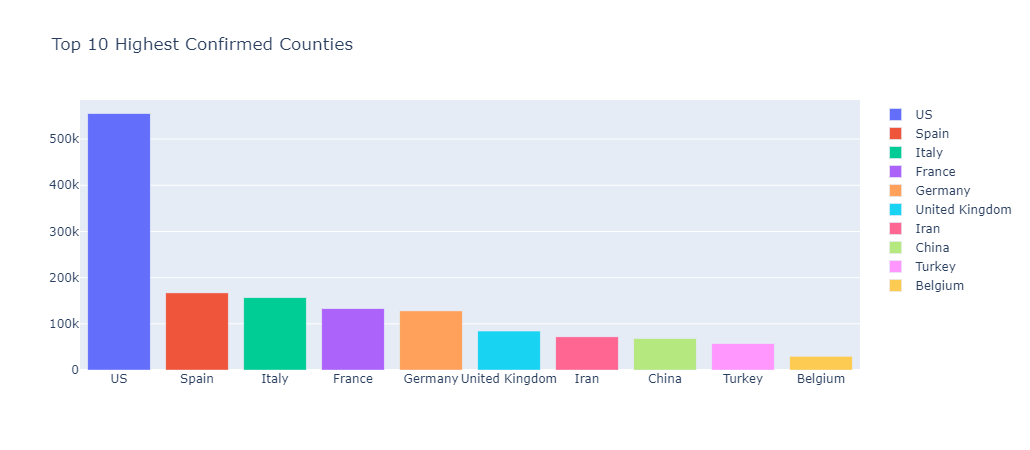

In [66]:
# printing the uniques confirmed contries

# print(style.BOLD + "\nUnique Confirmed Counties\n" + style.END)

fig = go.Figure()

for i in range(len(topConfirmedCasesCountry)):
    fig.add_traces(
        go.Bar(
            x=[topConfirmedCasesCountry["Country/Region"].iloc[i]],
            y=[topConfirmedCasesCountry[getLastDateOfConfirmed()].iloc[i]],
            name=topConfirmedCasesCountry["Country/Region"].iloc[i],
        )
    )

fig.update_layout(title="Top 10 Highest Confirmed Counties")
fig.show()

In [67]:
# getting the uniques death cases

death_country_cases = []
no_cases = []

for i in unique_deaths_countries:
    cases = latest_deaths[deathsCountryData["Country/Region"] == i].sum()

    if cases > 0:
        death_country_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_deaths_countries.remove(i)

unique_deaths_countries = [
    k
    for k, v in sorted(
        zip(unique_deaths_countries, death_country_cases),
        key=operator.itemgetter(1),
        reverse=False,
    )
]
for i in range(len(unique_deaths_countries)):
    death_country_cases[i] = latest_deaths[
        deathsCountryData["Country/Region"] == unique_deaths_countries[i]
    ].sum()

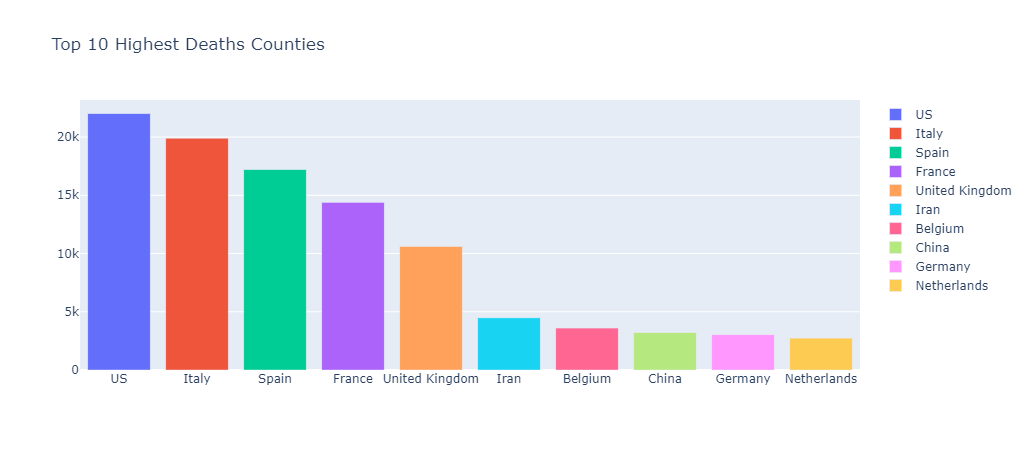

In [68]:
# printing the uniques death contries

fig = go.Figure()

for i in range(len(topDeathCasesCountry)):
    fig.add_traces(
        go.Bar(
            x=[topDeathCasesCountry["Country/Region"].iloc[i]],
            y=[topDeathCasesCountry[getLastDateOfDeaths()].iloc[i]],
            name=topDeathCasesCountry["Country/Region"].iloc[i],
        )
    )

fig.update_layout(title="Top 10 Highest Deaths Counties")
#     print(f'{unique_deaths_countries[i]}: {death_country_cases[i]}')

fig.show()

In [69]:
# getting the uniques recover cases

recover_country_cases = []
no_cases = []

for i in unique_recoveries_countries:
    cases = latest_recoveries[recoveredCountryData["Country/Region"] == i].sum()

    if cases > 0:
        recover_country_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_recoveries_countries.remove(i)

unique_recoveries_countries = [
    k
    for k, v in sorted(
        zip(unique_recoveries_countries, recover_country_cases),
        key=operator.itemgetter(1),
        reverse=False,
    )
]
for i in range(len(unique_recoveries_countries)):
    recover_country_cases[i] = latest_recoveries[
        recoveredCountryData["Country/Region"] == unique_recoveries_countries[i]
    ].sum()

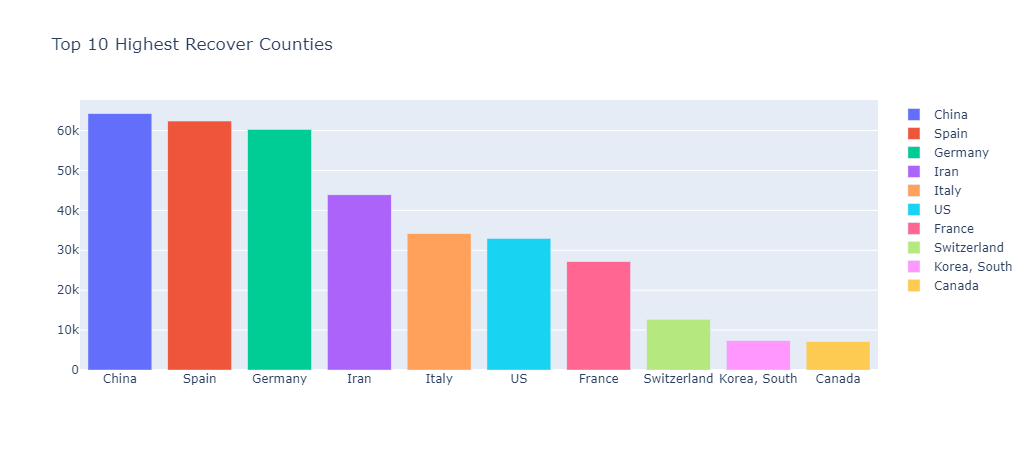

In [70]:
# printing the uniques recover contries


fig = go.Figure()

for i in range(len(topRecoverCasesCountry)):
    fig.add_traces(
        go.Bar(
            x=[topRecoverCasesCountry["Country/Region"].iloc[i]],
            y=[topRecoverCasesCountry[getLastDateOfRecoverd()].iloc[i]],
            name=topRecoverCasesCountry["Country/Region"].iloc[i],
        )
    )

#     print(f'{unique_recoveries_countries[i]}: {recover_country_cases[i]}')

fig.update_layout(title="Top 10 Highest Recover Counties")
fig.show()

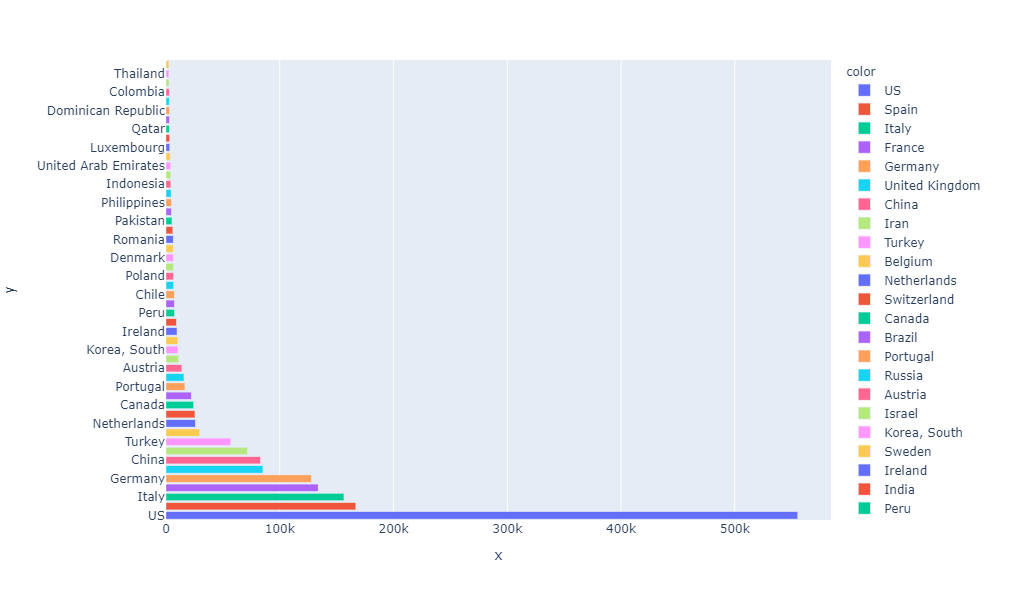

In [71]:
# Plotting Countries Date Wise On Graph

plottingConfirmData = (
    confirmedCountryData.groupby("Country/Region")[getLastDateOfConfirmed()]
    .sum()
    .sort_values(ascending=False)
    .head(50)
)

fig = px.bar(
    plottingConfirmData,
    x=plottingConfirmData.values,
    y=plottingConfirmData.index,
    hover_data=[plottingConfirmData.index, plottingConfirmData.values],
    color=plottingConfirmData.index,
    orientation="h",
    height=600,
)
fig.show()

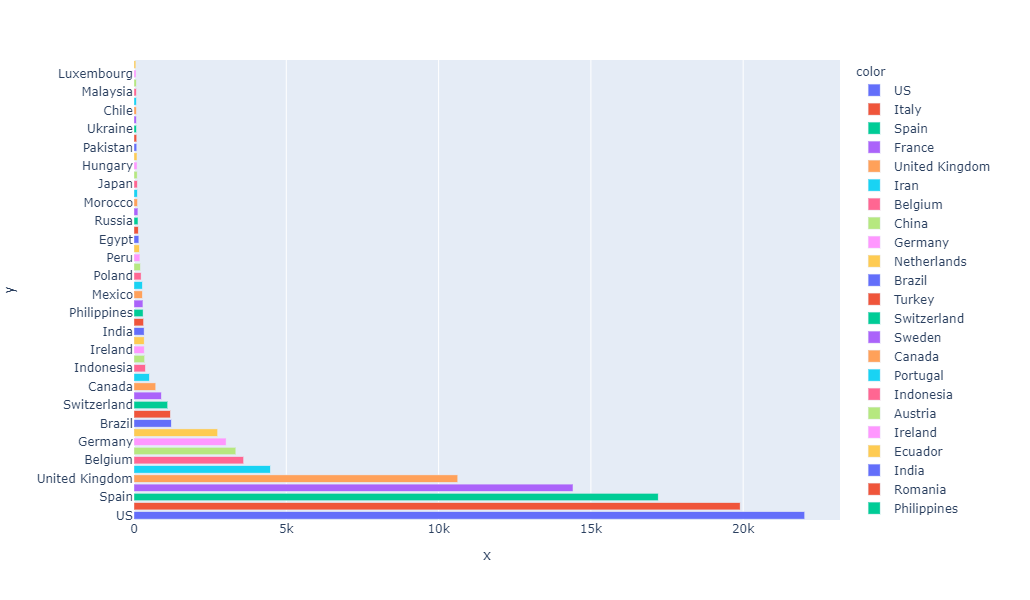

In [72]:
# Plotting Countries Date Wise On Graph

plottingDeathData = (
    deathsCountryData.groupby("Country/Region")[getLastDateOfDeaths()]
    .sum()
    .sort_values(ascending=False)
    .head(50)
)

fig = px.bar(
    plottingDeathData,
    x=plottingDeathData.values,
    y=plottingDeathData.index,
    hover_data=[plottingDeathData.index, plottingDeathData.values],
    color=plottingDeathData.index,
    orientation="h",
    height=600,
)
fig.show()

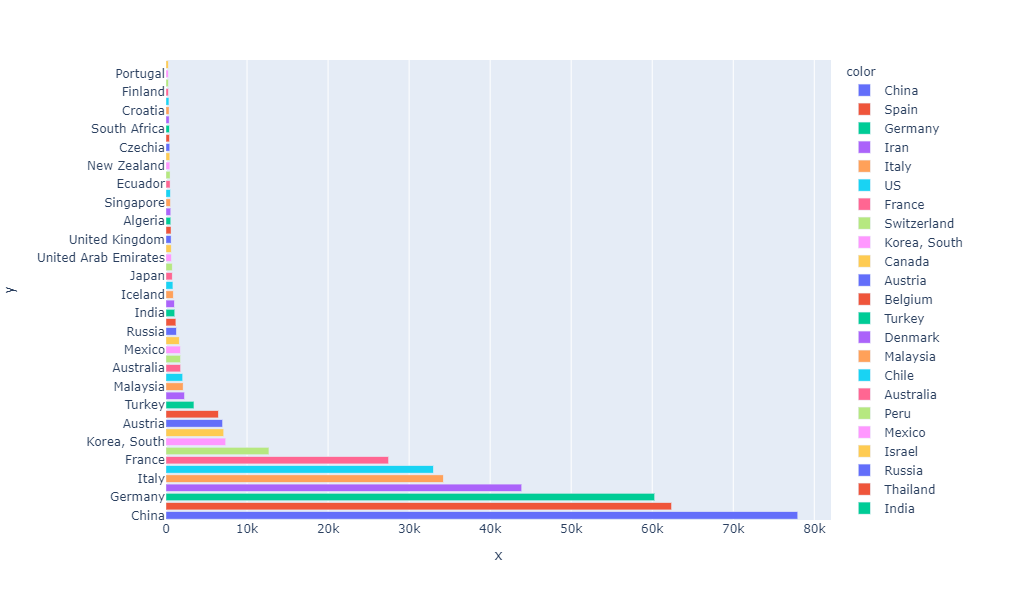

In [73]:
# Plotting Countries Date Wise On Graph

plottingRecoverData = (
    recoveredCountryData.groupby("Country/Region")[getLastDateOfRecoverd()]
    .sum()
    .sort_values(ascending=False)
    .head(50)
)

fig = px.bar(
    plottingRecoverData,
    x=plottingRecoverData.values,
    y=plottingRecoverData.index,
    hover_data=[plottingRecoverData.index, plottingRecoverData.values],
    color=plottingRecoverData.index,
    orientation="h",
    height=600,
)
fig.show()

In [74]:
# Country Wise Date gather


def countrybasedConfirmData(countryname):
    return confirmedCountryData.loc[
        confirmedCountryData["Country/Region"] == countryname
    ]


def countrybasedRecoverData(countryname):
    return recoveredCountryData.loc[
        recoveredCountryData["Country/Region"] == countryname
    ]


def countrybasedDeathData(countryname):
    return deathsCountryData.loc[deathsCountryData["Country/Region"] == countryname]

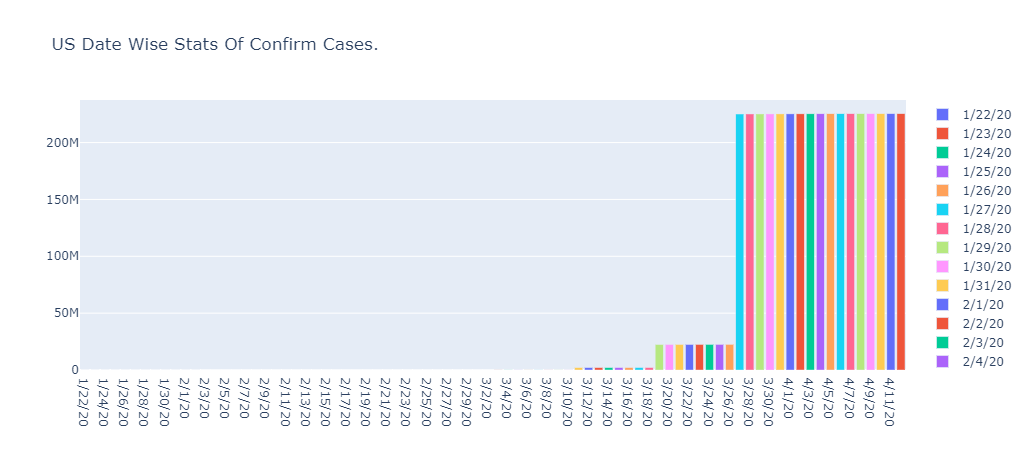

In [75]:
usdata = countrybasedConfirmData("US")
usdaterange = getDateRange(usdata)
data = usdata.loc[:, usdata.columns[4] : usdata.columns[-1]]
fig = go.Figure()

for i in range(len(usdaterange.columns)):
    fig.add_traces(
        go.Bar(
            x=[usdaterange.columns[i]],
            y=[usdata[usdaterange.columns[i]].to_string()],
            name=usdaterange.columns[i],
        )
    )

fig.update_layout(title="US Date Wise Stats Of Confirm Cases.")
fig.show()

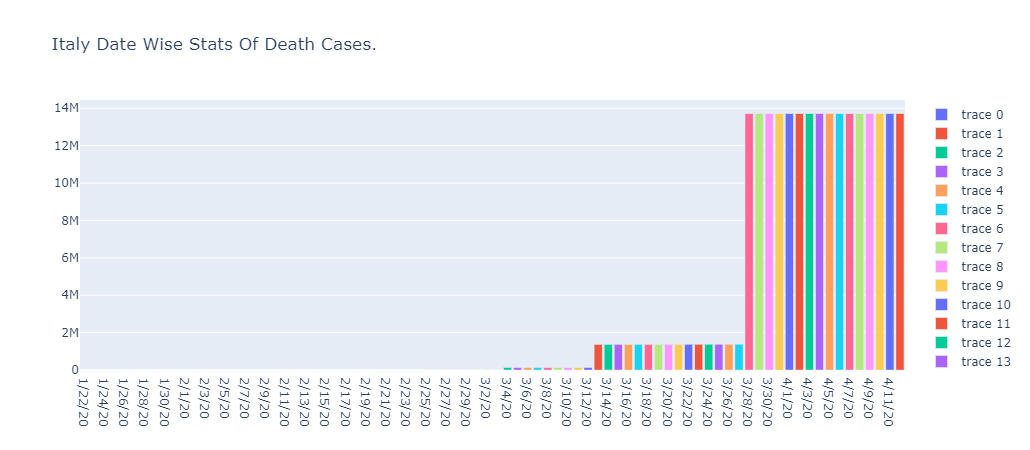

In [76]:
italydata = countrybasedDeathData("Italy")
italydaterange = getDateRange(italydata)
data = italydata.loc[:, italydata.columns[4] : italydata.columns[-1]]
fig = go.Figure()
for i in range(len(italydaterange.columns)):
    fig.add_traces(
        go.Bar(
            x=[italydaterange.columns[i]],
            y=[italydata[italydaterange.columns[i]].to_string()],
        )
    )

fig.update_layout(title="Italy Date Wise Stats Of Death Cases.")
fig.show()

In [77]:
confirm_data_as_on_1_22_20 = confirmedCountryData[
    ["Country/Region", "1/22/20"]
].sort_values(by="Country/Region")
confirm_data_as_on_lastdate = confirmedCountryData[
    ["Country/Region", getLastDateOfConfirmed()]
].sort_values(by="Country/Region")
death_data_as_on_1_22_20 = deathsCountryData[["Country/Region", "1/22/20"]].sort_values(
    by="Country/Region"
)
death_data_as_on_lastdate = deathsCountryData[
    ["Country/Region", getLastDateOfDeaths()]
].sort_values(by="Country/Region")
recover_data_as_on_1_22_20 = recoveredCountryData[
    ["Country/Region", "1/22/20"]
].sort_values(by="Country/Region")
recover_data_as_on_lastdate = recoveredCountryData[
    ["Country/Region", getLastDateOfRecoverd()]
].sort_values(by="Country/Region")

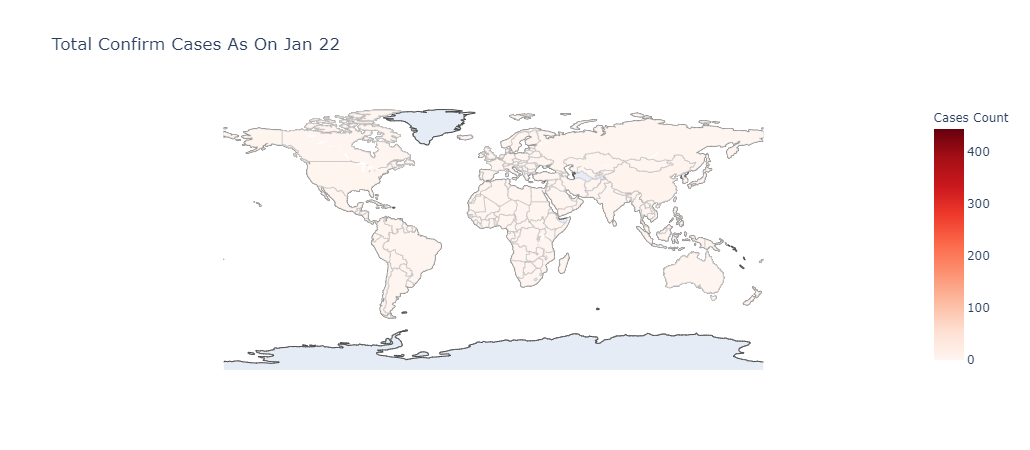

In [78]:
# plotting All confirm country cases on maps

fig = go.Figure(
    go.Choropleth(
        type="choropleth",
        locations=confirm_data_as_on_1_22_20["Country/Region"],
        locationmode="country names",
        z=confirm_data_as_on_1_22_20["1/22/20"],
        text=confirm_data_as_on_1_22_20["Country/Region"],
        colorscale="Reds",
        autocolorscale=False,
        reversescale=False,
        marker=dict(line=dict(color="rgb(180,180,180)", width=0.5)),
        colorbar=dict(title="Cases Count"),
    )
)

fig.update_layout(
    title="Total Confirm Cases As On Jan 22",
    geo=dict(showframe=False, showcoastlines=True,),
)

fig.show()

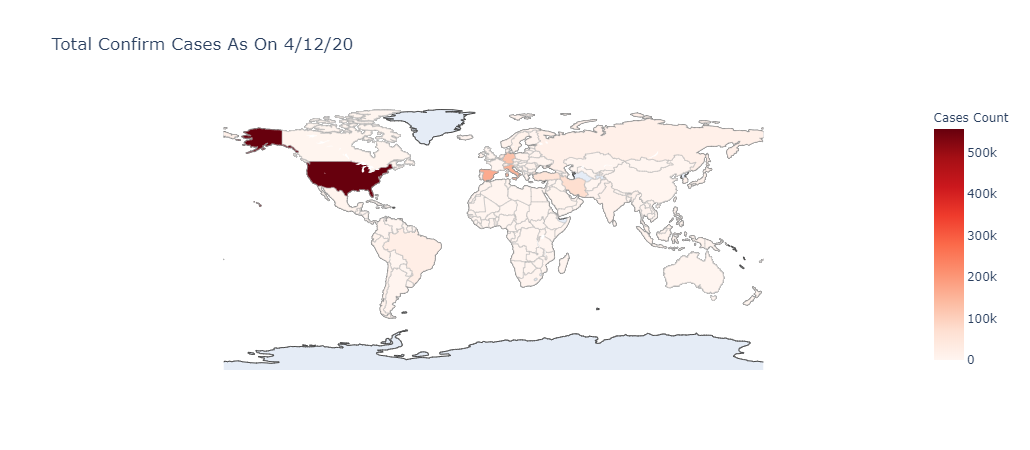

In [79]:
# plotting All confirm country cases on maps

fig = go.Figure(
    go.Choropleth(
        type="choropleth",
        locations=confirm_data_as_on_lastdate["Country/Region"],
        locationmode="country names",
        z=confirm_data_as_on_lastdate[getLastDateOfConfirmed()],
        text=confirm_data_as_on_lastdate["Country/Region"],
        colorscale="Reds",
        autocolorscale=False,
        reversescale=False,
        marker=dict(line=dict(color="rgb(180,180,180)", width=0.5)),
        colorbar=dict(title="Cases Count"),
    )
)

fig.update_layout(
    title="Total Confirm Cases As On " + getLastDateOfConfirmed(),
    geo=dict(showframe=False, showcoastlines=True,),
)

fig.show()

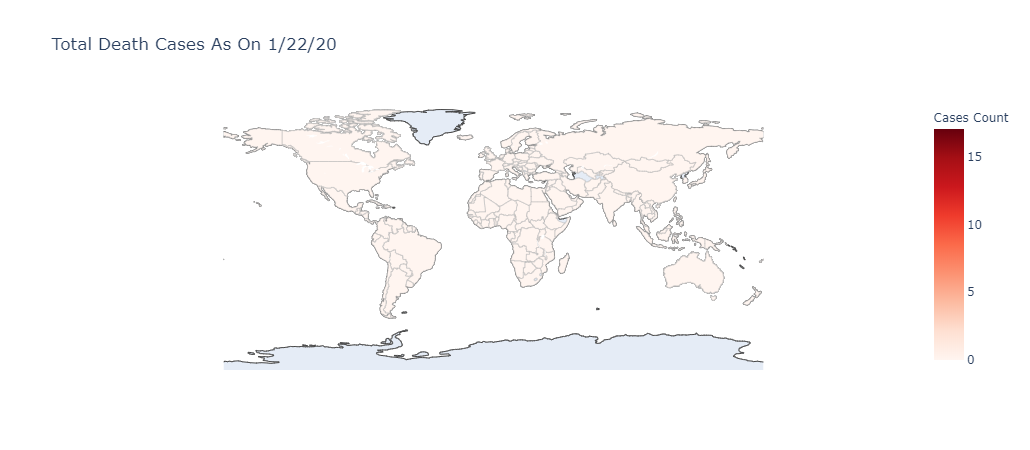

In [80]:
# plotting All death country cases on maps

fig = go.Figure(
    go.Choropleth(
        type="choropleth",
        locations=death_data_as_on_1_22_20["Country/Region"],
        locationmode="country names",
        z=death_data_as_on_1_22_20["1/22/20"],
        text=death_data_as_on_1_22_20["Country/Region"],
        colorscale="Reds",
        autocolorscale=False,
        reversescale=False,
        marker=dict(line=dict(color="rgb(180,180,180)", width=0.5)),
        colorbar=dict(title="Cases Count"),
    )
)

fig.update_layout(
    title="Total Death Cases As On 1/22/20",
    geo=dict(showframe=False, showcoastlines=True,),
)

fig.show()

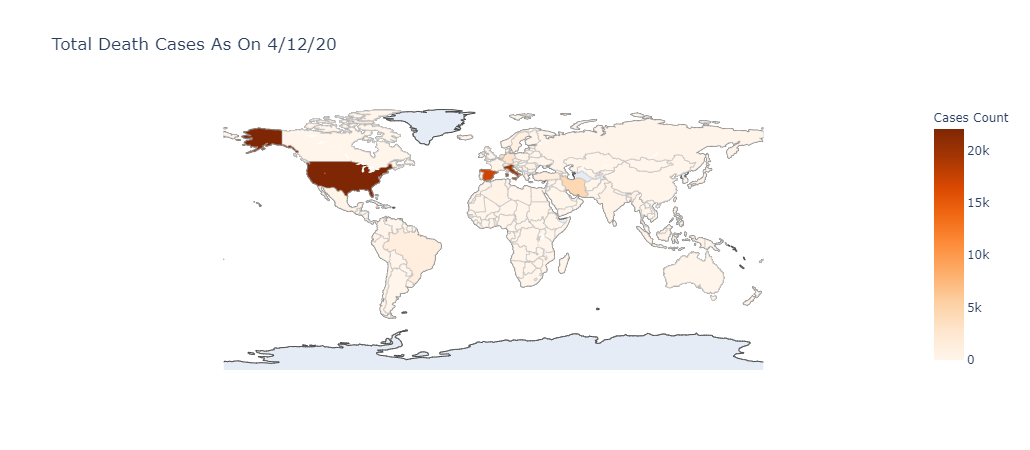

In [81]:
# plotting All death country cases on maps

fig = go.Figure(
    go.Choropleth(
        type="choropleth",
        locations=death_data_as_on_lastdate["Country/Region"],
        locationmode="country names",
        z=death_data_as_on_lastdate[getLastDateOfDeaths()],
        text=death_data_as_on_lastdate["Country/Region"],
        colorscale="oranges",
        autocolorscale=False,
        reversescale=False,
        marker=dict(line=dict(color="rgb(180,180,180)", width=0.5)),
        colorbar=dict(title="Cases Count"),
    )
)

fig.update_layout(
    title="Total Death Cases As On " + getLastDateOfDeaths(),
    geo=dict(showframe=False, showcoastlines=True,),
)

fig.show()

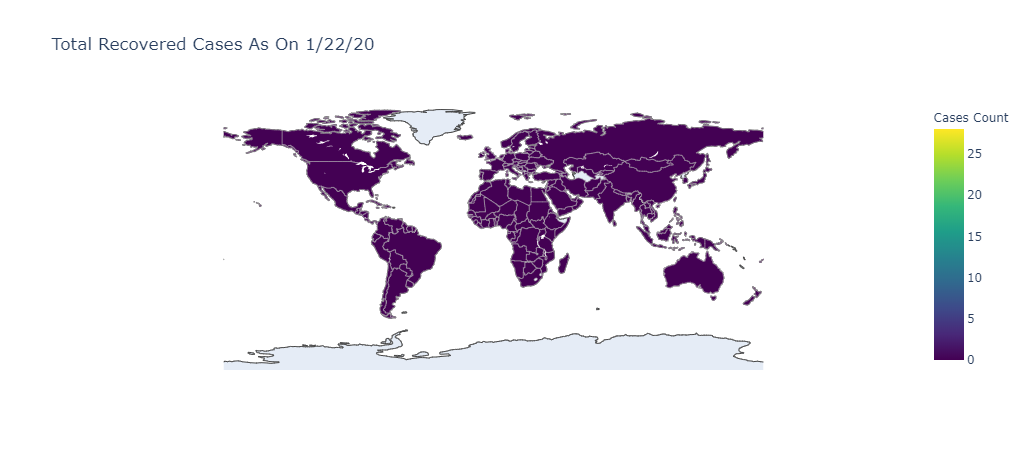

In [82]:
# plotting All death country cases on maps

fig = go.Figure(
    go.Choropleth(
        type="choropleth",
        locations=recover_data_as_on_1_22_20["Country/Region"],
        locationmode="country names",
        z=recover_data_as_on_1_22_20["1/22/20"],
        text=recover_data_as_on_1_22_20["Country/Region"],
        colorscale="viridis",
        autocolorscale=False,
        reversescale=False,
        marker=dict(line=dict(color="rgb(180,180,180)", width=0.5)),
        colorbar=dict(title="Cases Count"),
    )
)

fig.update_layout(
    title="Total Recovered Cases As On 1/22/20",
    geo=dict(showframe=False, showcoastlines=True,),
)

fig.show()

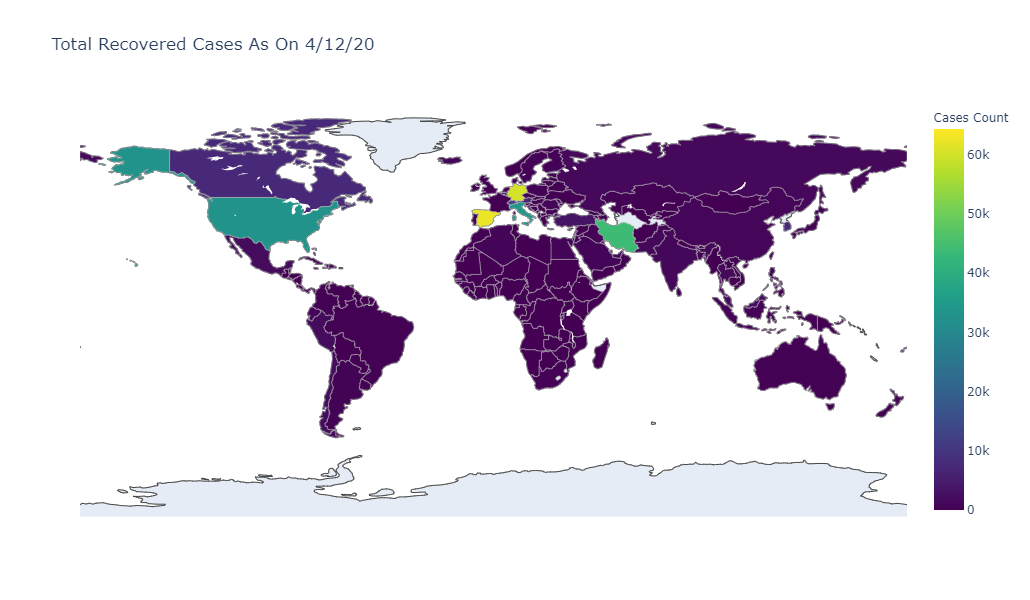

In [83]:
# plotting All death country cases on maps

fig = go.Figure(
    go.Choropleth(
        type="choropleth",
        locations=recover_data_as_on_lastdate["Country/Region"],
        locationmode="country names",
        z=recover_data_as_on_lastdate[getLastDateOfRecoverd()],
        text=recover_data_as_on_lastdate["Country/Region"],
        colorscale="viridis",
        autocolorscale=False,
        reversescale=False,
        marker=dict(line=dict(color="rgb(180,180,180)", width=0.5)),
        colorbar=dict(title="Cases Count"),
    )
)

fig.update_layout(
    mapbox_accesstoken=map_access_token,
    mapbox_zoom=3,
    height=600,
    title="Total Recovered Cases As On " + getLastDateOfRecoverd(),
    geo=dict(showframe=False, showcoastlines=True,),
)

fig.show()

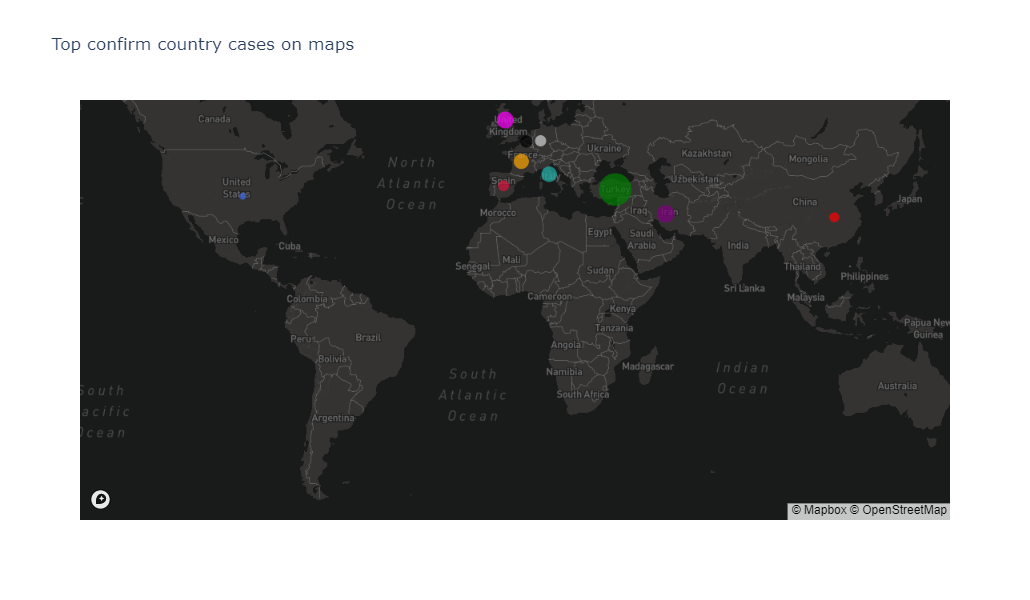

In [84]:
# plotting confirm country cases on maps


fig = go.Figure()

fig.add_trace(
    go.Scattermapbox(
        lon=topConfirmedCasesCountry["Long"],
        lat=topConfirmedCasesCountry["Lat"],
        text=topConfirmedCasesCountry["Country/Region"],
        marker=dict(
            size=topConfirmedCasesCountry.groupby("Country/Region")[
                getLastDateOfConfirmed()
            ].sum()
            / 1000,
            color=[
                "royalblue",
                "crimson",
                "lightseagreen",
                "orange",
                "lightgrey",
                "magenta",
                "purple",
                "red",
                "green",
            ],
            sizemode="area",
        ),
    )
)

fig.update_layout(
    title="Top confirm country cases on maps",
    height=600,
    mapbox=dict(
        accesstoken=map_access_token, bearing=0, pitch=0, zoom=1, style="dark",
    ),
)
fig.show()

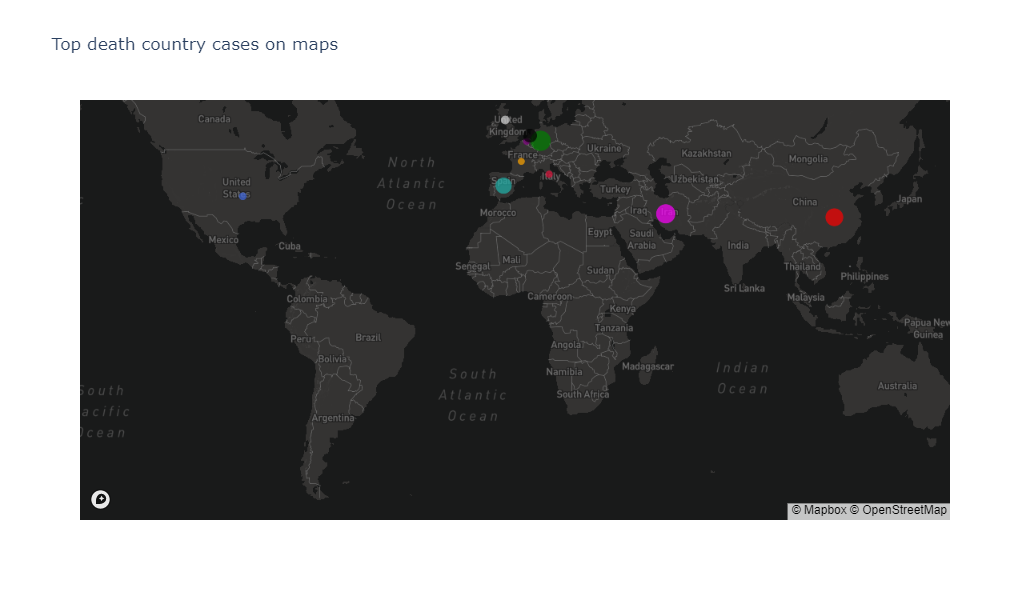

In [85]:
# plotting death country cases on maps


fig = go.Figure()

fig.add_trace(
    go.Scattermapbox(
        lon=topDeathCasesCountry["Long"],
        lat=topDeathCasesCountry["Lat"],
        text=topDeathCasesCountry[["Country/Region", getLastDateOfDeaths()]],
        marker=dict(
            size=topDeathCasesCountry.groupby("Country/Region")[
                getLastDateOfDeaths()
            ].sum()
            / 100,
            color=[
                "royalblue",
                "crimson",
                "lightseagreen",
                "orange",
                "lightgrey",
                "magenta",
                "purple",
                "red",
                "green",
            ],
            sizemode="area",
        ),
    )
)

fig.update_layout(
    title="Top death country cases on maps",
    height=600,
    mapbox=dict(
        accesstoken=map_access_token, bearing=0, pitch=0, zoom=1, style="dark",
    ),
)

fig.show()

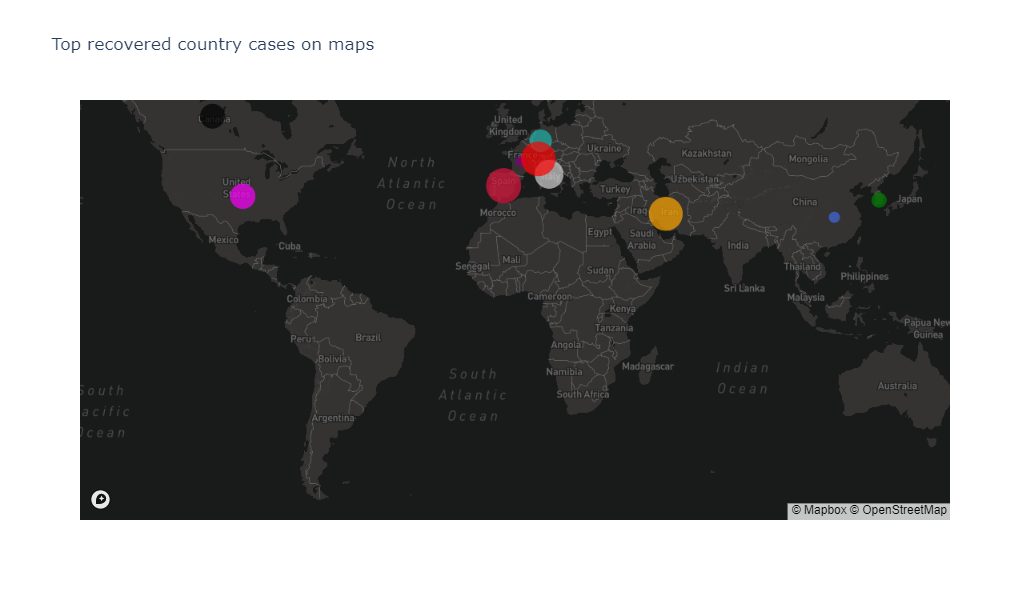

In [86]:
# plotting recover country cases on maps


fig = go.Figure()

fig.add_trace(
    go.Scattermapbox(
        lon=topRecoverCasesCountry["Long"],
        lat=topRecoverCasesCountry["Lat"],
        text=topRecoverCasesCountry["Country/Region"],
        marker=dict(
            size=topRecoverCasesCountry.groupby("Country/Region")[
                getLastDateOfRecoverd()
            ].sum()
            / 100,
            color=[
                "royalblue",
                "crimson",
                "lightseagreen",
                "orange",
                "lightgrey",
                "magenta",
                "purple",
                "red",
                "green",
            ],
            sizemode="area",
        ),
    )
)

fig.update_layout(
    title="Top recovered country cases on maps",
    height=600,
    mapbox=dict(
        accesstoken=map_access_token, bearing=0, pitch=0, zoom=1, style="dark",
    ),
)

fig.show()

In [87]:
# Plotting India Dataset On Graphs
# First Plotting the confirm case of india statewise


def getTopStateWithConfirmCase():
    return (
        indiadata.groupby("States")["Confirmed"]
        .sum()
        .sort_values(ascending=False)
        .head(10)
    )


def getTopStateWithDeathCase():
    return (
        indiadata.groupby("States")["Deaths"]
        .sum()
        .sort_values(ascending=False)
        .head(10)
    )


def getTopStateWithRecoverCase():
    return (
        indiadata.groupby("States")["Recovered"]
        .sum()
        .sort_values(ascending=False)
        .head(10)
    )

In [88]:
# getting the values and storing it to variable

topStatesWithHighestConfirmCasesIndia = getTopStateWithConfirmCase()
topStatesWithHighestDeathCasesIndia = getTopStateWithDeathCase()
topStatesWithHighestRecoverCasesIndia = getTopStateWithRecoverCase()

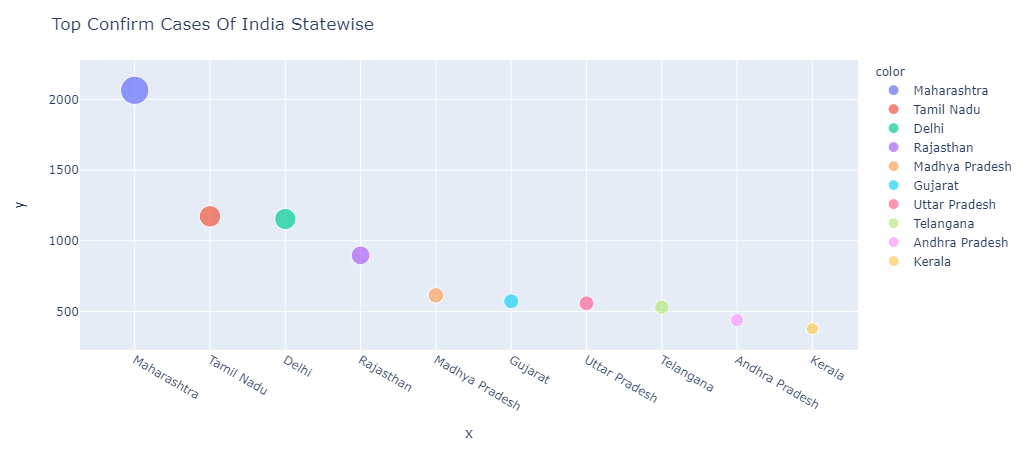

In [89]:
# showing the scatter graph of Highest Confirm Cases

fig = px.scatter(
    topStatesWithHighestConfirmCasesIndia,
    x=topStatesWithHighestConfirmCasesIndia.index,
    y=topStatesWithHighestConfirmCasesIndia.values,
    color=topStatesWithHighestConfirmCasesIndia.index,
    size=topStatesWithHighestConfirmCasesIndia.values / 100,
)
fig.update_layout(title="Top Confirm Cases Of India Statewise")
fig.show()

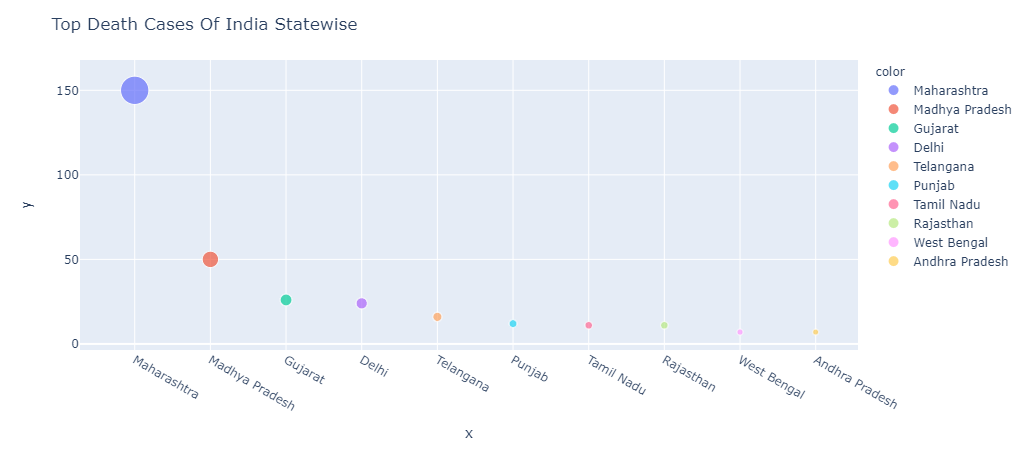

In [90]:
# Showing the Highest Cases Of Deaths

fig = px.scatter(
    topStatesWithHighestDeathCasesIndia,
    x=topStatesWithHighestDeathCasesIndia.index,
    y=topStatesWithHighestDeathCasesIndia.values,
    color=topStatesWithHighestDeathCasesIndia.index,
    size=topStatesWithHighestDeathCasesIndia.values / 100,
)
fig.update_layout(title="Top Death Cases Of India Statewise")
fig.show()

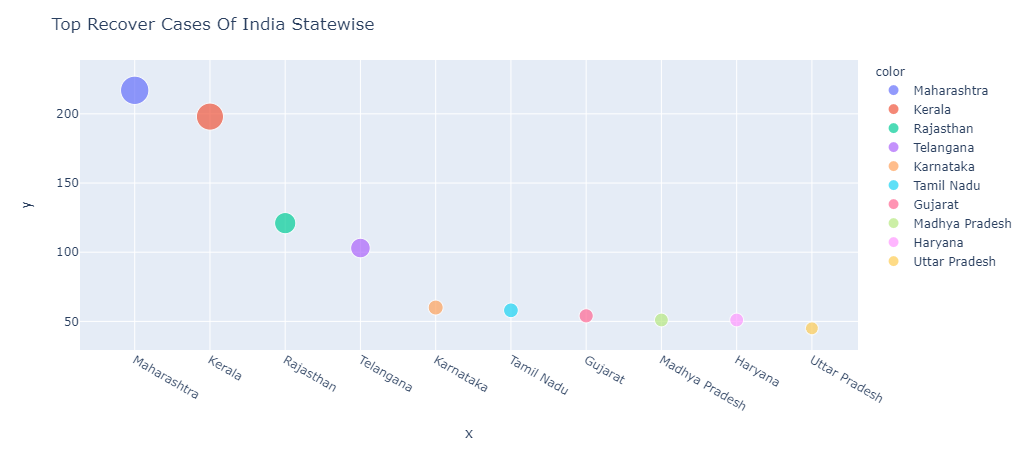

In [91]:
# Showing the Highest Cases Of Recoveries

fig = px.scatter(
    topStatesWithHighestRecoverCasesIndia,
    x=topStatesWithHighestRecoverCasesIndia.index,
    y=topStatesWithHighestRecoverCasesIndia.values,
    color=topStatesWithHighestRecoverCasesIndia.index,
    size=topStatesWithHighestRecoverCasesIndia.values / 100,
)
fig.update_layout(title="Top Recover Cases Of India Statewise")
fig.show()

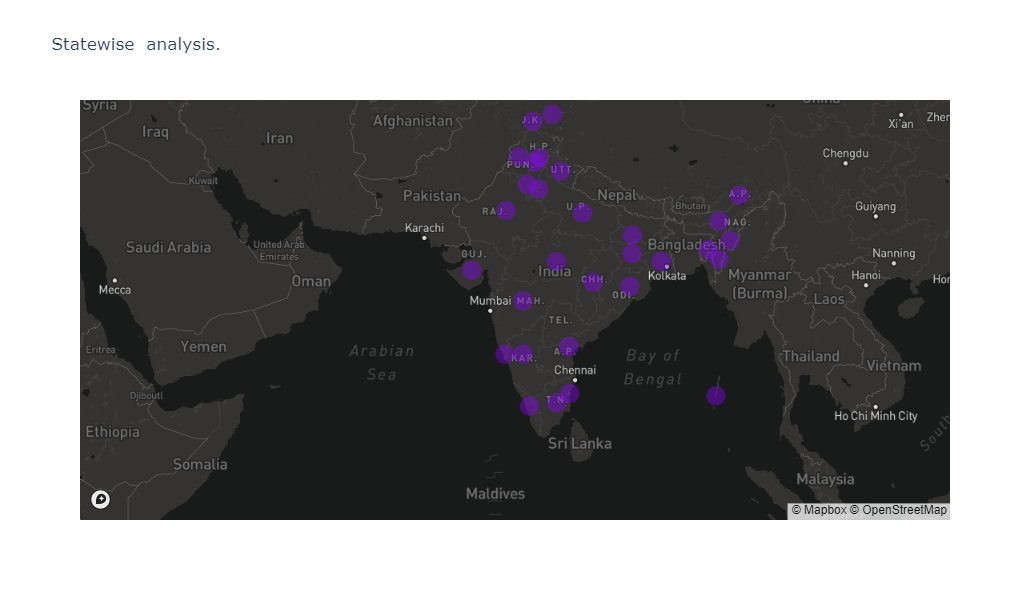

In [92]:
# Plotting States on map with data

# fig = go.Figure(
#     data=go.Scattergeo(
#         lon=indiadata["Lon"],
#         lat=indiadata["Lat"],
#         text=indiadata[["States", "Confirmed", "Deaths", "Recovered"]],
#         mode="markers",
#         marker=dict(
#             color=[
#                 "royalblue",
#                 "crimson",
#                 "lightseagreen",
#                 "orange",
#                 "lightgrey",
#                 "magenta",
#                 "purple",
#                 "red",
#                 "green",
#                 "gray",
#                 "yellow",
#                 "lightgreen",
#                 "lightblue",
#                 "white",
#                 "pink",
#                 "indigo",
#                 "aquamarine",
#                 "azure",
#             ],
#             size=15,
#         ),
#     )
# )

# fig.update_layout(
#     title="Statewise stats analysis.",
#     mapbox_style="Bergeron",
#     mapbox_accesstoken=map_access_token,
#     mapbox_zoom=5,
#     mapbox_center={"lat": 19.7515, "lon": 75.51},
# )
# fig.show()


fig = go.Figure(
    go.Scattermapbox(
        lon=indiadata["Lon"],
        lat=indiadata["Lat"],
        text=indiadata[["States", "Confirmed", "Deaths", "Recovered"]],
        mode="markers",
        marker=dict(color="rgba(140,0,255,.4)", size=20,),
    )
)

fig.update_layout(
    title="Statewise  analysis.",
    hovermode="closest",
    mapbox=dict(
        accesstoken=map_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(lat=19, lon=75),
        pitch=0,
        zoom=3,
        style="dark",
    ),
    height=600,
)

In [93]:
# Getting the Active Cases Of India Data
total_active = []

for i in range(len(indiadata)):
    total_active.append(
        indiadata["Confirmed"][i] - (indiadata["Deaths"][i] + indiadata["Recovered"][i])
    )

indiadata["total_active"] = total_active

In [94]:
indiadata.describe()

SN       Active    Confirmed      Deaths   Recovered        Lat  \
count  37.000000    37.000000    37.000000   37.000000   37.000000  30.000000   
mean   18.000000   222.945946   263.891892    9.216216   31.729730  23.334890   
std    10.824355   385.667599   443.098985   25.793125   51.536206   6.830224   
min     0.000000     0.000000     0.000000    0.000000    0.000000  10.850500   
25%     9.000000     1.000000     2.000000    0.000000    0.000000  20.051550   
50%    18.000000    28.000000    32.000000    1.000000   12.000000  23.775500   
75%    27.000000   250.000000   378.000000    7.000000   45.000000  28.582575   
max    36.000000  1697.000000  2064.000000  150.000000  217.000000  34.299600   

             Lon  total_active  
count  30.000000     37.000000  
mean   81.532700    222.945946  
std     6.962936    385.667599  
min    71.192400      0.000000  
25%    76.347375      1.000000  
50%    78.838100     28.000000  
75%    85.304800    250.000000  
max    94.727800   1697.000000

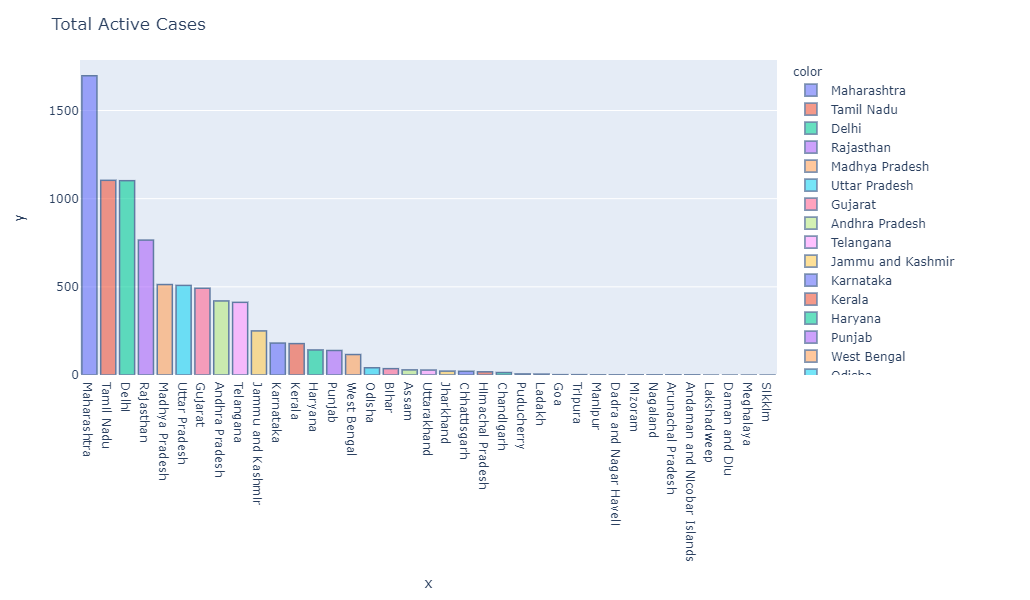

In [95]:
totalActiveCasesIndia = (
    indiadata.groupby("States")["total_active"].sum().sort_values(ascending=False)
)

fig = px.bar(
    totalActiveCasesIndia,
    x=totalActiveCasesIndia.index,
    y=totalActiveCasesIndia.values,
    color=totalActiveCasesIndia.index,
    height=600,
)
fig.update_traces(
    marker_line_color="rgb(8,48,107)", marker_line_width=1.5, opacity=0.6,
)
fig.update_layout(title_text="Total Active Cases ")
fig.show()

In [ ]:
# Date Wise India Confirm Cases 

date = indiadata["Date"]
date

In [96]:
# Mortality Rate in india

indiadata["Mortality"] = (indiadata["Deaths"] / indiadata["Confirmed"]) * 100

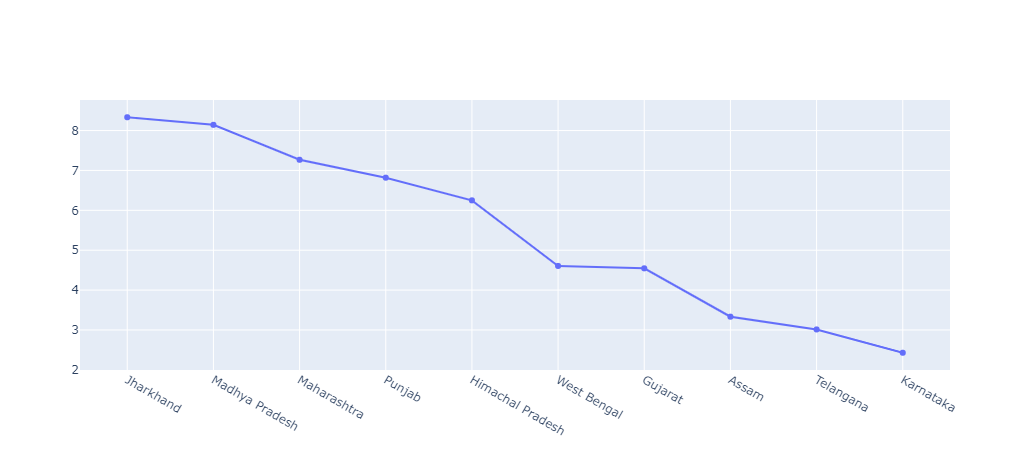

In [97]:
# Plotting the mortality rate of each country
# the proportion of people who die from a specified disease among all individuals diagnosed with the disease over a certain period of time.
StateWithHighMortalityRate = (
    indiadata[["States", "Mortality"]]
    .sort_values(by="Mortality", ascending=False)
    .head(10)
)


fig = go.Figure(
    data=go.Scatter(
        x=StateWithHighMortalityRate["States"],
        y=StateWithHighMortalityRate["Mortality"],
    )
)

fig.show()

In [98]:
completeData = pd.read_csv("./complete.csv")

In [99]:
dates = completeData["Date"]
days = np.array([i for i in range(len(dates))]).reshape(-1, 1)
y = (completeData.Confirmed) - (completeData.Recovered + completeData.Deaths)
confirmed = np.array([int(i) for i in y]).reshape(-1, 1)
days_future = 30
future_forecast_days = np.array([i for i in range(len(dates) + days_future)]).reshape(
    -1, 1
)
adjusted_dates = future_forecast_days[:-30]

In [100]:
# convert integers into date time for visualization
import datetime

start_date = datetime.datetime.strptime("03/03/2020", "%m/%d/%Y")
future_forecaste_dates = []

for i in range(len(future_forecast_days)):
    future_forecaste_dates.append(
        (start_date + datetime.timedelta(days=i)).strftime("%m/%d/%Y")
    )

In [101]:
kernel = ["poly", "sigmoid", "rbf"]
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {
    "kernel": kernel,
    "C": c,
    "gamma": gamma,
    "epsilon": epsilon,
    "shrinking": shrinking,
}

svm = SVR()
svm_search = RandomizedSearchCV(
    svm,
    svm_grid,
    scoring="neg_mean_squared_error",
    cv=3,
    return_train_score=True,
    n_jobs=-1,
    n_iter=100,
    verbose=1,
)
(
    X_train_confirmed,
    X_test_confirmed,
    y_train_confirmed,
    y_test_confirmed,
) = train_test_split(days, confirmed, test_size=0.15, shuffle=False)

In [ ]:
svm_search.fit(X_train_confirmed, y_train_confirmed.ravel())


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.0min


In [ ]:
svm_search.best_params_